# Прогнозирование оттока сотрудников

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# EDA

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/RShoose/Data/main/HR.csv')

In [8]:
data = data.rename(columns={'sales': 'department'})
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
np.round(data.isna().sum()/len(data), 2)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

## Категориальные признаки

In [20]:
outcome_Work_accident = pd.crosstab(index=data['left'], columns=data['Work_accident'], normalize ='index')
outcome_Work_accident.index= ['Did not leave', 'Left']
outcome_Work_accident

Work_accident,0,1
Did not leave,0.824991,0.175009
Left,0.952674,0.047326


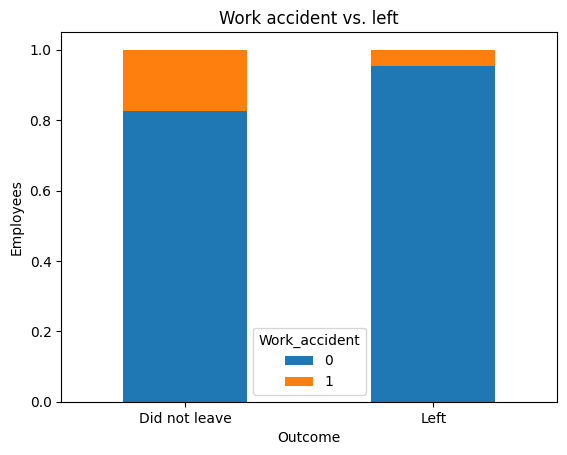

In [27]:
 outcome_Work_accident.plot(kind='bar', stacked = True)

plt.title('Work accident vs. left')
plt.xlabel('Outcome')
plt.ylabel('Employees')
plt.xticks(rotation = 0, horizontalalignment = 'center')

plt.show()

In [34]:
outcome_promotion_last_5years = pd.crosstab(index=data['left'], columns=data['promotion_last_5years'], normalize = 'index')
outcome_promotion_last_5years.index=['Did not leave', 'Left']
outcome_promotion_last_5years

promotion_last_5years,0,1
Did not leave,0.973749,0.026251
Left,0.994679,0.005321


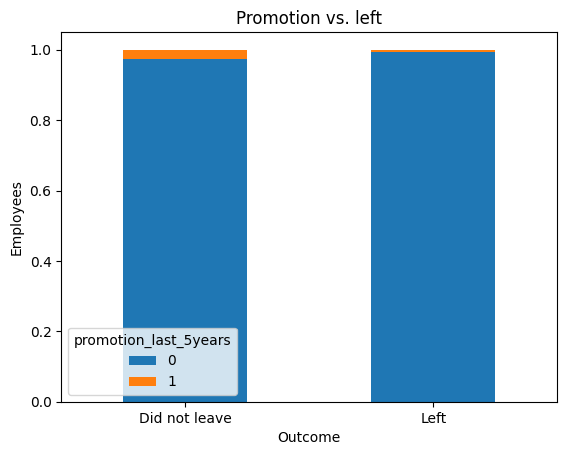

In [36]:
outcome_promotion_last_5years.plot(kind='bar', stacked = True)

plt.title('Promotion vs. left')
plt.xlabel('Outcome')
plt.ylabel('Employees')
plt.xticks(rotation = 0, horizontalalignment = 'center')

plt.show()

In [37]:
outcome_department = pd.crosstab(index=data['left'], columns=data['department'], normalize = 'index')
outcome_department.index=['Did not leave', 'Left']
outcome_department

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
Did not leave,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021
Left,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183


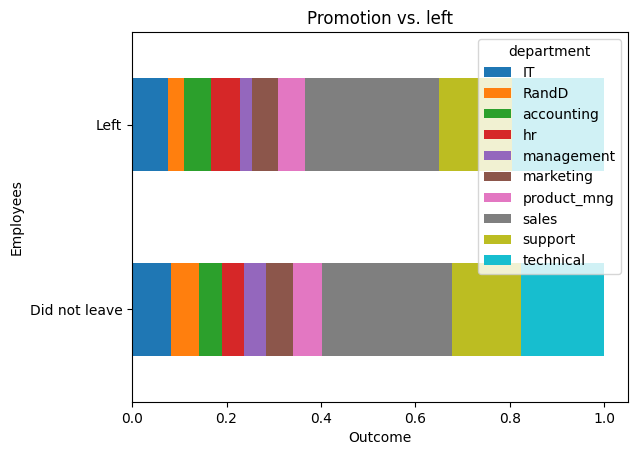

In [42]:
outcome_department.plot.barh(stacked = True)

plt.title('Promotion vs. left')
plt.xlabel('Outcome')
plt.ylabel('Employees')
plt.xticks(rotation = 0, horizontalalignment = 'center')

plt.show()

In [46]:
plot1 = data['department'].value_counts()

<Axes: xlabel='department'>

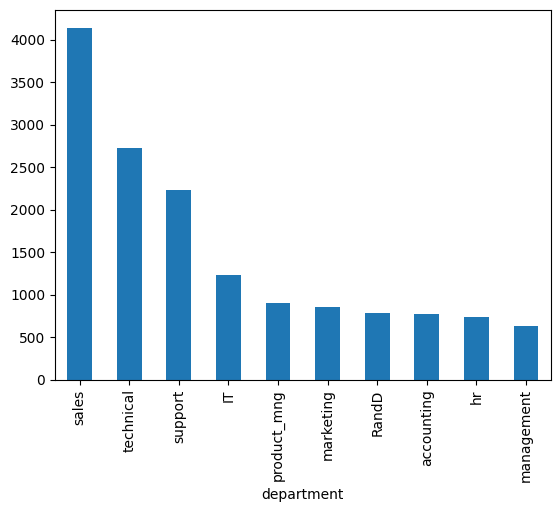

In [47]:
plot1.plot(kind='bar')

In [56]:
# какой процент sales ушёл и правда ли там высокая текучка
data.groupby('department')['left'].mean().sort_values()

department
management     0.144444
RandD          0.153748
product_mng    0.219512
IT             0.222494
marketing      0.236597
sales          0.244928
support        0.248991
technical      0.256250
accounting     0.265971
hr             0.290934
Name: left, dtype: float64

In [49]:
data['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

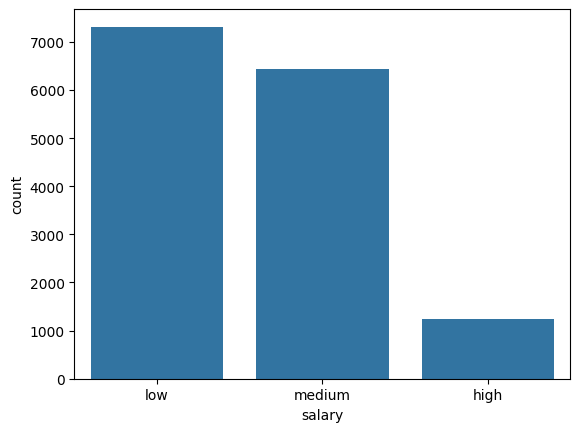

In [50]:
sns.countplot(x='salary', data = data)

In [63]:
salary_dept = pd.crosstab(index=data['department'], columns=data['salary'], normalize = 'index')
salary_dept

salary,high,low,medium
department,,,
IT,0.067645,0.496333,0.436023
RandD,0.064803,0.462516,0.472681
accounting,0.096480,0.466754,0.436767
hr,0.060893,0.453315,0.485792
management,0.357143,0.285714,0.357143
marketing,0.093240,0.468531,0.438228
product_mng,0.075388,0.500000,0.424612
sales,0.064976,0.507005,0.428019
support,0.063257,0.514132,0.422611


<Axes: ylabel='department'>

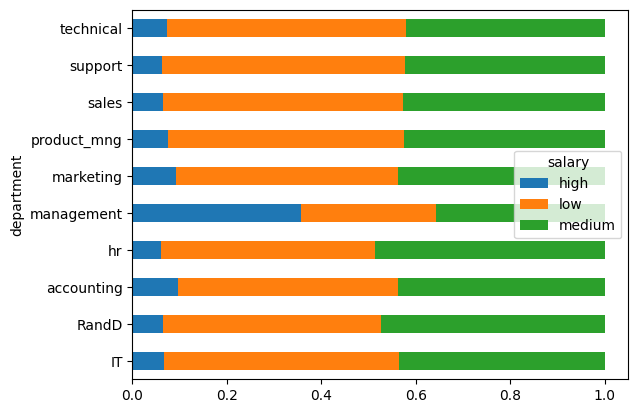

In [64]:
salary_dept.plot.barh(stacked = True)

In [70]:
outcome_salary = pd.crosstab(index=data['left'], columns=data['salary'], normalize='index')
outcome_salary

salary,high,low,medium
left,,,
0,0.101068,0.450123,0.448810
1,0.022963,0.608233,0.368804


<Axes: xlabel='left'>

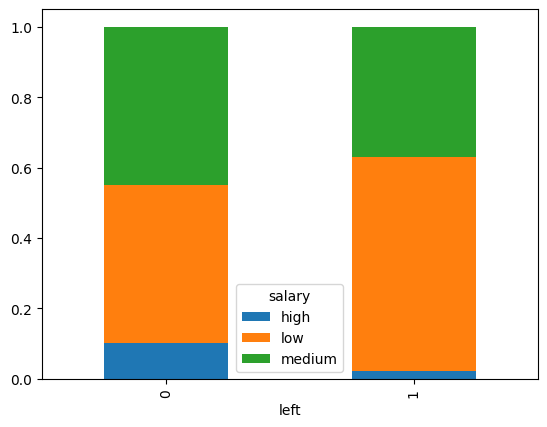

In [71]:
outcome_salary.plot(kind='bar', stacked='true')

In [75]:
outcome_time_spend = pd.crosstab(index=data['left'], columns = data['time_spend_company'], normalize = 'index')
outcome_time_spend.index = ['left', 'did not leave']
outcome_time_spend

time_spend_company,2,3,4,5,6,7,8,10
left,0.279226,0.425009,0.14587,0.056003,0.044540,0.016451,0.014176,0.018726
did not leave,0.014842,0.444133,0.24923,0.233268,0.058527,0.000000,0.000000,0.000000


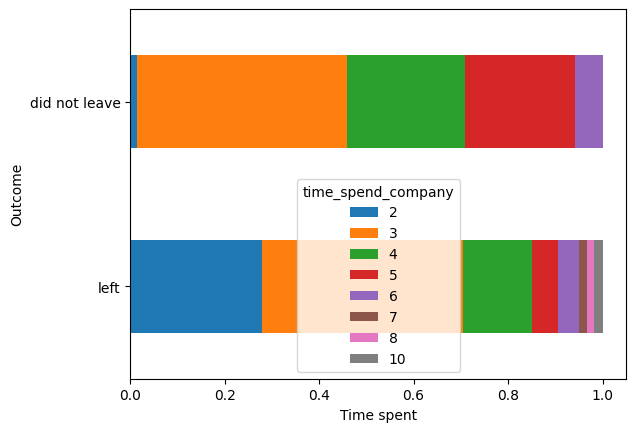

In [78]:
outcome_time_spend.plot.barh(stacked = True)
plt.xlabel('Time spent')
plt.ylabel('Outcome')

plt.show()

In [84]:
proj_left = data.groupby('left').number_project.mean()
proj_left


left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

<Axes: xlabel='left'>

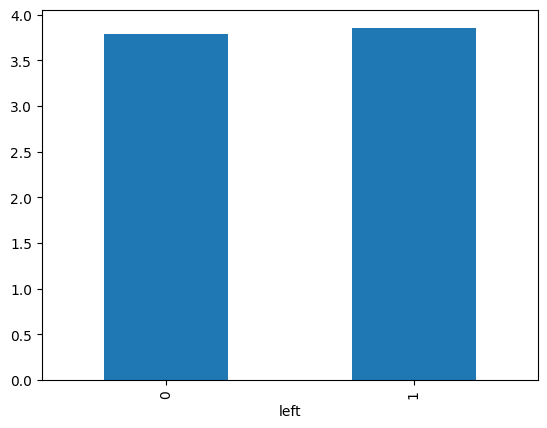

In [85]:
proj_left.plot(kind='bar')


In [86]:
outcome_number_project = pd.crosstab(index = data['left'], columns = data['number_project'], normalize = 'index')
outcome_number_project.index = ['Did not leave','left']
outcome_number_project

number_project,2,3,4,5,6,7
Did not leave,0.071841,0.348530,0.346167,0.188047,0.045415,0.000000
left,0.438813,0.020162,0.114534,0.171381,0.183422,0.071689


<Axes: >

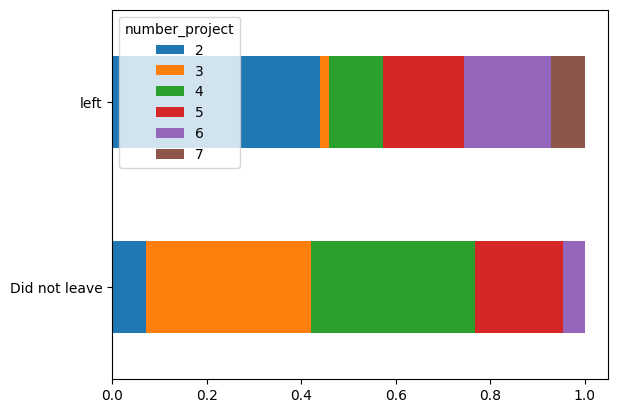

In [88]:
outcome_number_project.plot.barh(stacked = True)

# Количественные признаки

In [91]:
data[['satisfaction_level', 'last_evaluation', 'average_montly_hours']].describe() 

,satisfaction_level,last_evaluation,average_montly_hours
count,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,201.050337
std,0.248631,0.171169,49.943099
min,0.090000,0.360000,96.000000
25%,0.440000,0.560000,156.000000
50%,0.640000,0.720000,200.000000
75%,0.820000,0.870000,245.000000
max,1.000000,1.000000,310.000000


[Text(0, 0.5, 'frequency')]

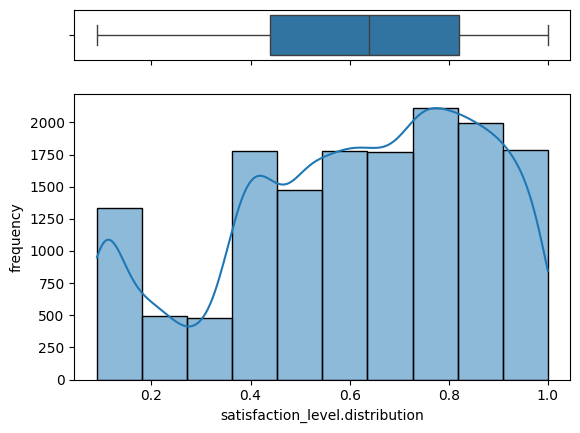

In [93]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw = {'height_ratios': (.15, .85)})
sns.boxplot(x=data['satisfaction_level'], ax = ax_box)
sns.histplot(x=data['satisfaction_level'], ax = ax_hist, bins=10, kde = True)

ax_box.set(xlabel='')
ax_hist.set(xlabel='satisfaction_level.distribution')
ax_hist.set(ylabel='frequency')

# Выбросы

In [100]:
q1 = data.satisfaction_level.quantile(0.25)
q3 = data.satisfaction_level.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

outliers_set = data[(data.satisfaction_level < lower_bound) | (data.satisfaction_level > upper_bound)]
outliers_set.head()

-0.12999999999999995 1.39


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [101]:
q1 = data.last_evaluation.quantile(0.25)
q3 = data.last_evaluation.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

outliers_set = data[(data.last_evaluation < lower_bound) | (data.last_evaluation > upper_bound)]
outliers_set.head()

0.09500000000000014 1.335


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [102]:
q1 = data.average_montly_hours.quantile(0.25)
q3 = data.average_montly_hours.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

outliers_set = data[(data.average_montly_hours < lower_bound) | (data.average_montly_hours > upper_bound)]
outliers_set.head()

22.5 378.5


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


# Обработка данных

In [104]:
data['sat_level_log']=np.log(data['satisfaction_level'])
data['last_eval__log']=np.log(data['last_evaluation'])
data['av_hours_log']=np.log(data['average_montly_hours'])

In [107]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['salary'] = labelencoder.fit_transform(data['salary'])

In [109]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['department'] = labelencoder.fit_transform(data['department'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,sat_level_log,last_eval__log,av_hours_log
0,0.38,0.53,2,157,3,0,1,0,7,1,-0.967584,-0.634878,5.056246
1,0.80,0.86,5,262,6,0,1,0,7,2,-0.223144,-0.150823,5.568345
2,0.11,0.88,7,272,4,0,1,0,7,2,-2.207275,-0.127833,5.605802
3,0.72,0.87,5,223,5,0,1,0,7,1,-0.328504,-0.139262,5.407172
4,0.37,0.52,2,159,3,0,1,0,7,1,-0.994252,-0.653926,5.068904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1,-0.916291,-0.562119,5.017280
14995,0.37,0.48,2,160,3,0,1,0,8,1,-0.994252,-0.733969,5.075174
14996,0.37,0.53,2,143,3,0,1,0,8,1,-0.994252,-0.634878,4.962845
14997,0.11,0.96,6,280,4,0,1,0,8,1,-2.207275,-0.040822,5.634790


# Анализ корреляции

In [111]:
data_c = data[
        ['satisfaction_level', 
         'sat_level_log',
         'last_evaluation',
         'last_eval__log',
         'number_project',
         'average_montly_hours',
         'av_hours_log',
         'time_spend_company',
         'Work_accident',
         'promotion_last_5years',
         'salary'
        ]
    ]
data_c.corr()

,satisfaction_level,sat_level_log,last_evaluation,last_eval__log,number_project,average_montly_hours,av_hours_log,time_spend_company,Work_accident,promotion_last_5years,salary
satisfaction_level,1.000000,0.949314,0.105021,0.114711,-0.142970,-0.020048,0.014397,-0.100866,0.058697,0.025605,0.011754
sat_level_log,0.949314,1.000000,-0.002241,0.005773,-0.298883,-0.147903,-0.108646,-0.140665,0.062868,0.030810,0.007329
last_evaluation,0.105021,-0.002241,1.000000,0.993539,0.349333,0.339742,0.341594,0.131591,-0.007104,-0.008684,0.013965
last_eval__log,0.114711,0.005773,0.993539,1.000000,0.350842,0.343198,0.346368,0.120811,-0.004792,-0.008747,0.011811
number_project,-0.142970,-0.298883,0.349333,0.350842,1.000000,0.417211,0.401839,0.196786,-0.004741,-0.006064,0.009672
average_montly_hours,-0.020048,-0.147903,0.339742,0.343198,0.417211,1.000000,0.992331,0.127755,-0.010143,-0.003544,0.007082
av_hours_log,0.014397,-0.108646,0.341594,0.346368,0.401839,0.992331,1.000000,0.114082,-0.005120,-0.002629,0.007648
time_spend_company,-0.100866,-0.140665,0.131591,0.120811,0.196786,0.127755,0.114082,1.000000,0.002120,0.067433,-0.003086
Work_accident,0.058697,0.062868,-0.007104,-0.004792,-0.004741,-0.010143,-0.005120,0.002120,1.000000,0.039245,-0.002506
promotion_last_5years,0.025605,0.030810,-0.008684,-0.008747,-0.006064,-0.003544,-0.002629,0.067433,0.039245,1.000000,-0.001318


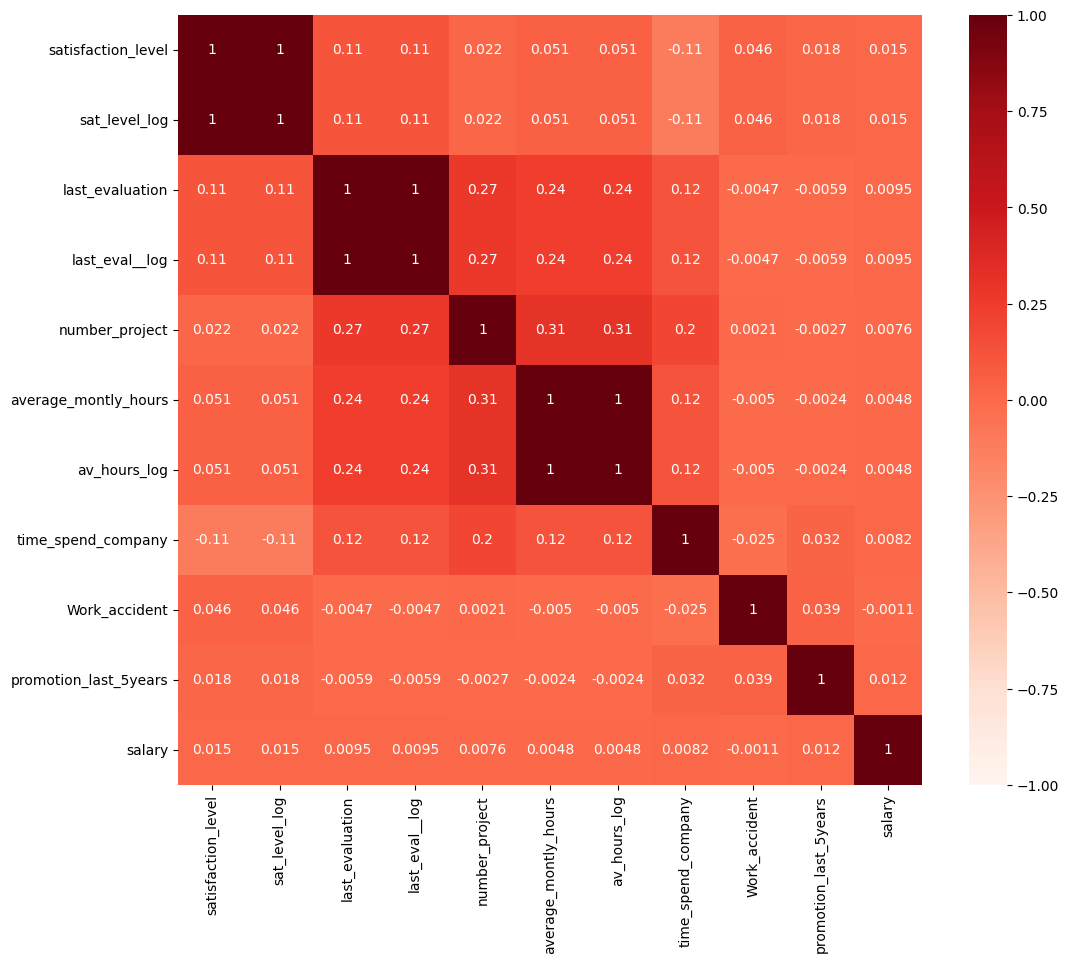

In [115]:
plt.figure(figsize=(12,10))

cor=data_c.corr(method='kendall')

ax = sns.heatmap(cor, annot=True, vmin=-1, vmax=1, center=0, cmap=plt.cm.Reds)

In [116]:
c = data_c.corr(method='kendall').abs()
s=c.unstack()
so=s.sort_values(kind='quicksort')

# Моделирование